# K-MEANS ALGORITHM

This exercise consists of three parts. Finish the first part to get a mark of 3.0; the first two parts for 4.0. Complete all three parts to get 5.0. <br>
Advanced* and optional - means it is optional and will not affect the grade.

## Part 1

In [14]:
import random

### SOME IMPORTS
import common as cm
import numpy as np
import matplotlib.pyplot as plt
import random
from common import Point

1.1) Complete the following distance function

In [115]:
# Computes a Euclidean distance between points A and B (these are vectors, i.e., A[0], A[1], ....)
def getEuclideanDistance(A, B):
    distance = 0
    assert len(A) == len(B)
    for i in range(len(A)):
        distance += (A[i] - B[i]) ** 2
    return distance ** 0.5

    
### TEST
print(getEuclideanDistance([0.0, 0.0], [0.0, 1.0]))
print(getEuclideanDistance([0.0, 0.0], [1.0, 1.0]))

1.0
1.4142135623730951


1.2) Get test data set & display (data = matrix n x m, n = the number of objects, m = the number of attributes)

In [28]:
data = cm.getTestDataSet()
data

[[0.25980258928914035, 0.7655116779002312],
 [0.18693830608897657, 0.7834271584229567],
 [0.2323892511073395, 0.8060266414635234],
 [0.18245127527368585, 0.7431398467959367],
 [0.2098729415587089, 0.7344682346313631],
 [0.18853229067689722, 0.7842951000809403],
 [0.26912569720966584, 0.7957361528430443],
 [0.19020098972108546, 0.7975175323493953],
 [0.25085655998780676, 0.7246018248223394],
 [0.23532339919378903, 0.871543741261008],
 [0.12962857187109472, 0.873595307576713],
 [0.16401114075234427, 0.7755297044641337],
 [0.16308955536890288, 0.8316926011744782],
 [0.18106441442797522, 0.9119848308841574],
 [0.165411426713162, 0.7653802653838561],
 [0.23742600682065826, 0.8080106874749717],
 [0.15264496361992702, 0.8414462176171933],
 [0.23463371747059406, 0.8019563670471643],
 [0.16481091484141902, 0.7577539191560507],
 [0.15633882350658837, 0.8655833090434761],
 [0.2837812257433207, 0.8077914273778376],
 [0.2581598534580727, 0.8188071959347848],
 [0.14944464908218136, 0.819739481888331

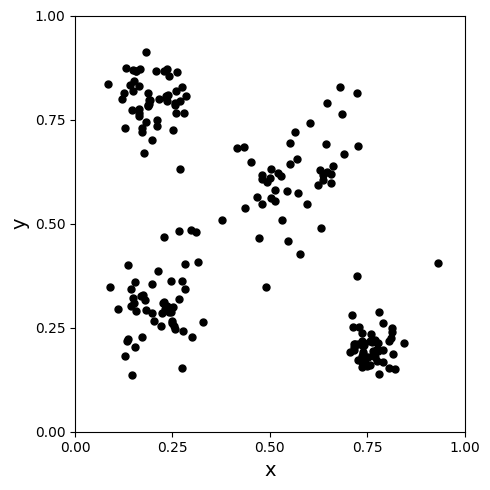

In [29]:
cm.displayDataSet(plt, data) #plt = plot package; see the imports above

**How many different clusters (groups) do you see here?**

In [30]:
4

4

The data for this exercise was generated artificially. You can run the below code to see the "true" group assignment.

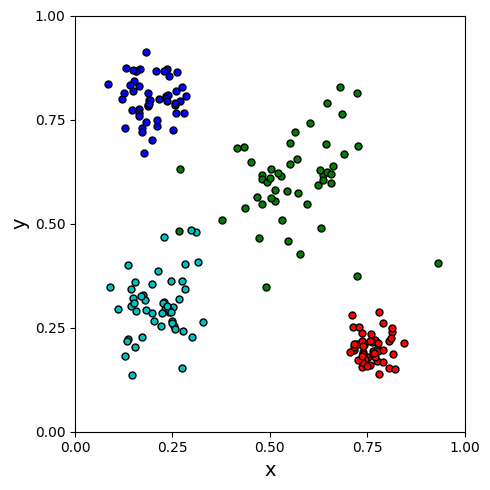

In [31]:
data = cm.getTestDataSet()
assignments = cm.getTestAssignments() ### GET "TRUE" GROUP ASSIGNMENT
cm.displayDataSet(plt, data, assignments = assignments)

1.3) K-Means implementation: Firstly, we need to construct K "centroids". Each centroid represents one group. For simplicity, initially assume that the centroids are randomly selected from the data set (i.e., clone/copy some K random points from data set). Check numpy.random package. Important: each centroid should be unique (no repetitions, consider a "shuffle" approach). Finish the bolow code.

In [32]:
### return a vector of centroids (vectors) [[x1, y1], ..., [xk, yk]]
def getCentroids(k, data):
    indices = np.random.choice(list(range(0, len(data))), size=k, replace=False)
    return [data[index] for index in indices]

print(getCentroids(2, data))

[[0.2194647059389752, 0.25498108946833176], [0.24169932968804955, 0.2925707474727543]]


1.4) Get acquainted with some parameters: 
- DATA - test data set, a vector of  n 2d points: [[x1, y1], ..., [xn, yn]], loaded from common.py
- M - the number of attributes/dimensions; M = 2 for this exercise,
- K - expected number of groups,
- CENTROIDS - initial K centroids; CENTROIDS =  [[x1, y1],...,[xk, yk]],
- ASSIGNMENTS - data structure representing group assignments; ASSIGNMENTS = [[idx1_1,...,],....,[idx1_K,....]], i.e., i-th element is a vector of indexes of corresponding data points in DATA, being assigned to i-th group. For instance if |DATA| = 3, K = 2, and ASSIGNMENTS = [[0, 2], [1]], it means that DATA[0] and DATA[2] points are assigned to the first group, while DATA[1] point is assigned to the second group.

1.5) Finish the below function. It should perform a single step of K-Means algorithm:

a) Firstly, construct new group assignments. For this reason, iterate over all data points. For each (i-th) point, verify its distance to each (k-th) centroid. Check for which centroid the distance is the smallest and update NEW_ASSIGNMENTS adequately (NEW_ASSIGNMENTS[k-th centroid].append(i-th index/data point)).

Important: NO_CHANGE boolean variable should be set to False if the assignments have changed from the previous iteration to the current one (NEW_ASSIGNMENTS != (OLD) ASSIGNMENTS). 

b) Update centroids (NEW_CENTROIDS), i.e., compute centers of masses of data points belonging to different groups. 

c) Return NO_CHANGE, NEW_ASSIGNMENTS, NEW_CENTROIDS.

In [119]:
def get_closest_centroid_index(point, CENTROIDS) -> int:
    distances = [getEuclideanDistance(point, centroid) for centroid in CENTROIDS]
    return distances.index(min(distances))


def get_mean_of_point(points):
    centroid = []
    for i in range(len(points[0])):
        centroid.append(np.mean([point[i] for point in points]))
    return centroid


def doKMeansStep(DATA, M, K, CENTROIDS, ASSIGNMENTS):
    ### CONSTRUCT NEW ASSIGNMENTS
    NEW_ASSIGNMENTS = [[] for k in range(K)]
    for i, point in enumerate(DATA):
        NEW_ASSIGNMENTS[get_closest_centroid_index(point, CENTROIDS)].append(i)
    NO_CHANGE = (ASSIGNMENTS == NEW_ASSIGNMENTS)

    ### CONSTRUCT NEW CENTROIDS
    NEW_CENTROIDS = []
    for index_cluster in NEW_ASSIGNMENTS:
        cluster_point_list = [DATA[index] for index in index_cluster]
        NEW_CENTROIDS.append(get_mean_of_point(cluster_point_list))

    return NO_CHANGE, NEW_CENTROIDS, NEW_ASSIGNMENTS

1.6) The below code performs 1 iteration of K-Menas algorithm for K=2 and the test data set. Check the results (notice that centroids are marked with squares).

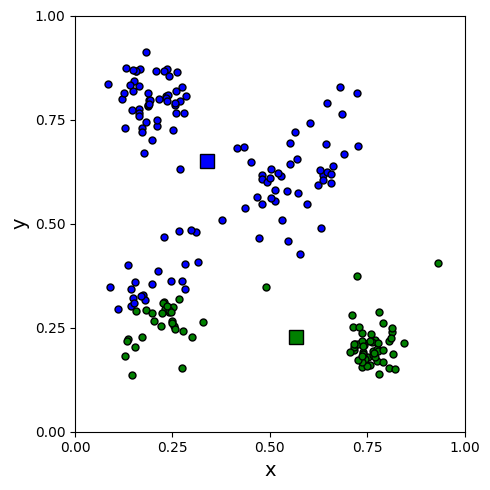

In [38]:
DATA = cm.getTestDataSet()
CENTROIDS = getCentroids(2, DATA)
NO_CHANGE, CENTROIDS, ASSIGNMENTS = doKMeansStep(DATA, 2, 2, CENTROIDS.copy(), None)
cm.displayDataSet(plt, DATA, assignments = ASSIGNMENTS, centroids = CENTROIDS)

1.7) Complete the below piece of code. The doKMeans function should perform 100 steps of K-Means algorithm. However, the loop should be stopped when the NO_CHANGE variable = True. It that is so, **print the information on after how many iterations the process has stopped**. Lastly, use cm.displayDataSet to depict the final groups. 

(Advanced*): make an animation showing the steps of the K-means algorithm. It is easier to do in jupyter notebook.
https://matplotlib.org/3.3.2/api/animation_api.html
http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/

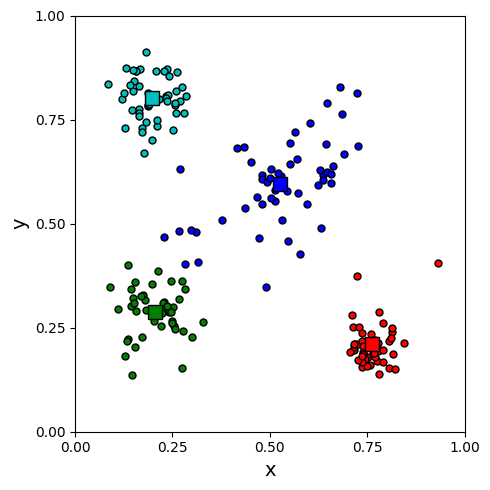

In [52]:
def doKMeans(DATA, CENTROIDS, K = 2, M = 2, display = True):
    ASSIGNMENTS = [[] for i in range(K)]
    NO_CHANGE = False
    for i in range(100):
        if NO_CHANGE:
            break
        NO_CHANGE, CENTROIDS, ASSIGNMENTS = doKMeansStep(DATA, M, K, CENTROIDS, ASSIGNMENTS)
    return DATA, CENTROIDS, ASSIGNMENTS   

K = 4
DATA = cm.getTestDataSet()
CENTROIDS = getCentroids(K, DATA)
DATA, CENTROIDS, ASSIGNMENTS = doKMeans(DATA, CENTROIDS, K = K)
cm.displayDataSet(plt, DATA, assignments = ASSIGNMENTS, centroids = CENTROIDS)

1.8) Run the below piece of code and observe the results. Which K seems to be the best choice?

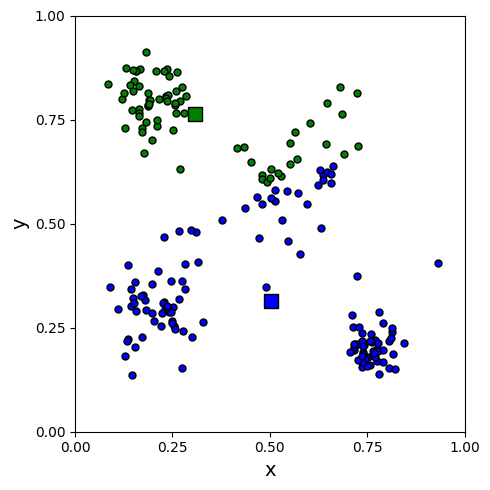

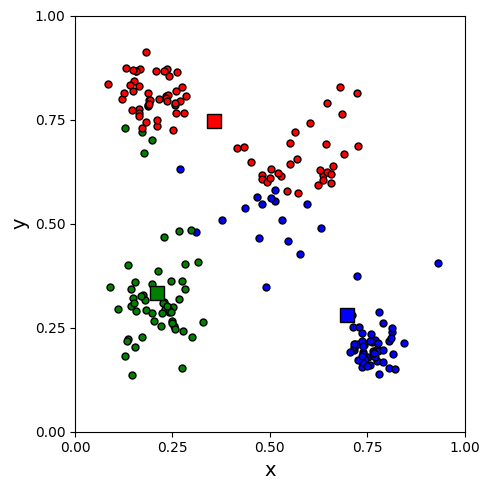

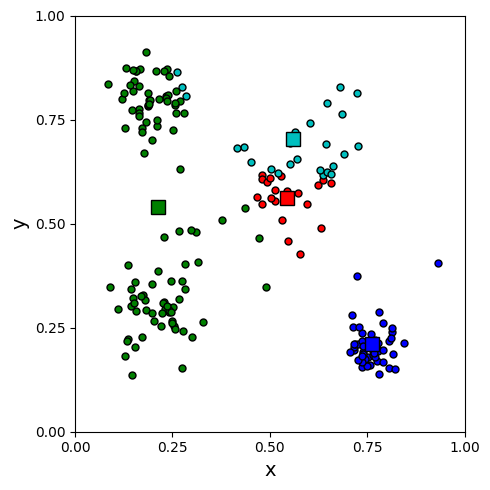

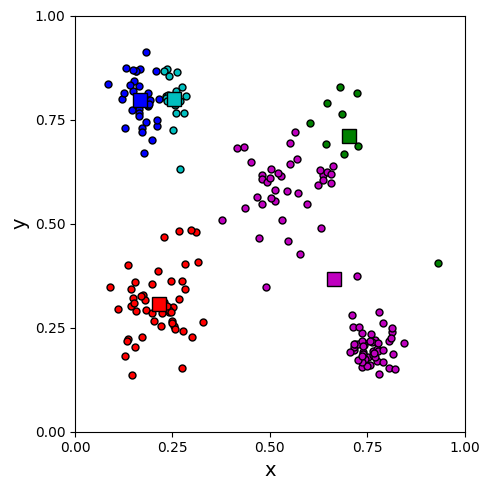

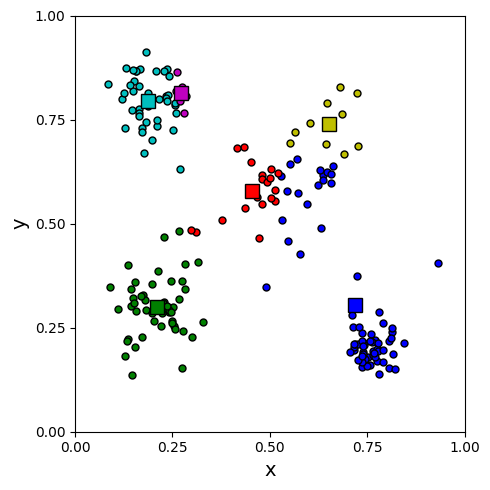

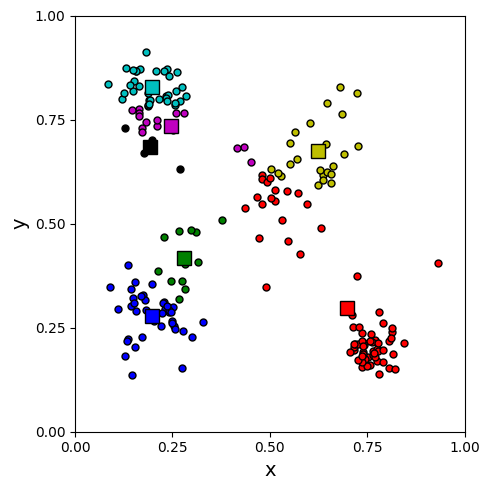

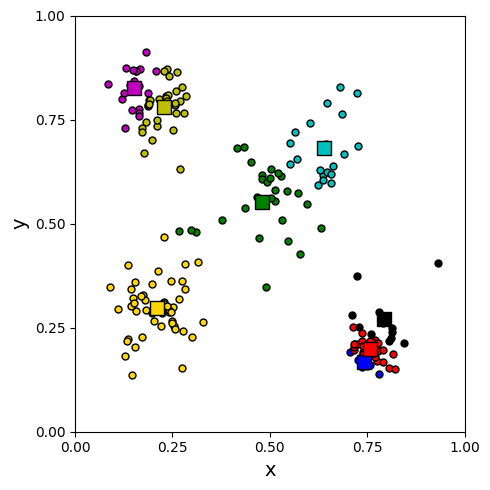

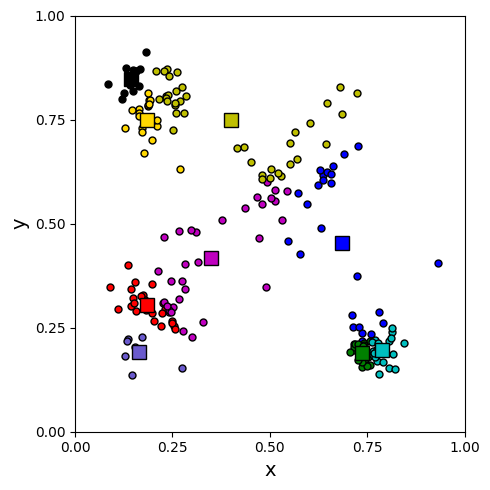

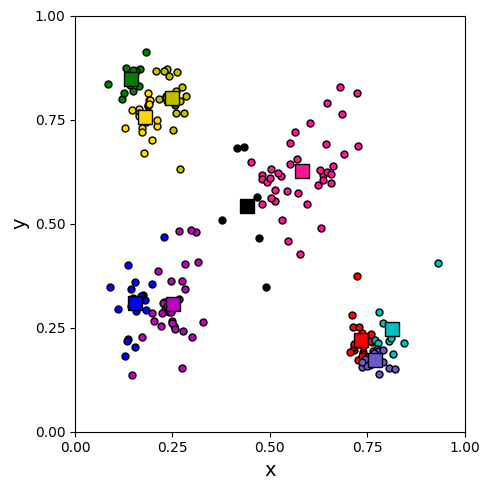

In [57]:
DATA = cm.getTestDataSet()
for k in range(2, 11):
    CENTROIDS = getCentroids(k, DATA)
    DATA, NEW_CENTROIDS, NEW_ASSIGNMENTS = doKMeans(DATA, CENTROIDS, K = k)
    cm.displayDataSet(plt, DATA, assignments = NEW_ASSIGNMENTS, centroids = NEW_CENTROIDS)

As mentioned previously, 4 seems to be the best choice.

## Part 2

In [ ]:
displayResults

The quality of final group assignment can be assessed in various ways. In this exercise, you are asked to compute a total (sum) distance between data points and their cluster centroids for different values of K. Obviously, it is expected that such indicator will always decrese with the increase of K. But, obviously, $K=\infty$ is not the best option. However, there exsits some threshold K' such that for each K'' > K' the decrease will not be significant. This threshold is called an "elbow" and its corresponding K value is considered satisfactory. Firstly, complete the below function. It should compute the total (sum) distance between data points and their cluster centroids. Secondly, compute the the total distances for final clusters for for $K\in [2, 10]$. Then, plot the results. Use cm.displayResults(plt, results), where results takes the follwoing form: [[2, result for K = 2], [3, result for K = 3], ..., [10, result for K = 10]]. **Find the "elbow"**.

In [58]:
def getTotalDistance(DATA, CENTROIDS, ASSIGNMENTS):
    total_distance = 0
    for cluster_index, points_indices in enumerate(ASSIGNMENTS):
        for point_index in points_indices:
            total_distance += getEuclideanDistance(DATA[point_index], CENTROIDS[cluster_index])
    return total_distance

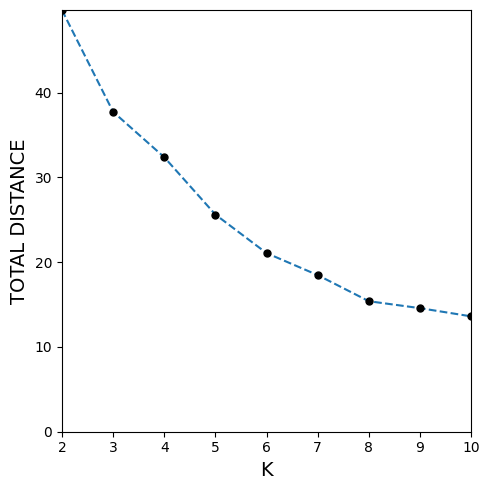

In [71]:
from collections import defaultdict
from common import displayResults
SIMULATIONS = 1_00
simulation_list = []
for _ in range(SIMULATIONS):
    DATA = cm.getTestDataSet()
    total_distance_list = []
    for k in range(2, 11):
        CENTROIDS = getCentroids(k, DATA)
        DATA, CENTROIDS, ASSIGNMENTS = doKMeans(DATA, CENTROIDS, K = k)
        total_distance_list.append(getTotalDistance(DATA, CENTROIDS, ASSIGNMENTS))
    simulation_list.append(total_distance_list)

k_size_and_values = defaultdict(list)
for simulation in simulation_list:
    for k, k_result in enumerate(simulation, 2):
        k_size_and_values[k].append(k_result)

simulation_result = []
for k_size, values in k_size_and_values.items():
    simulation_result.append([k_size, np.mean(values)])

displayResults(plt, simulation_result)

For large number of simulations (for example exceeding 1_000) it is hard to find an elbow.
It was a surprise for us that most of the time, when the simulation number is lower, the best choice seems to be between 5 and 7.
From looking at the clusters plot we previously, assumed 4 to be an obvious answer.

# Part 3 - a small case study

In this exercise you are asked to use the K-Means algorithm to cluster some data provided in cm.getCaseDataSet() (important note, this data was generated artificially - this is not real-world data). This data contains information on 250 persons. Each person is characterized with the following attributes:

a) Age <br>
b) Salary (zł) <br> 
c) Health index (0-100; 0 = worst health, 100 = best health) <br>
d) Time spent in school or work (hours) <br>
e) Time spent on sport activities (hours) <br>

Follow these steps:
1. Load the data. 
2. Check the min and max values for each attribute and consider normalization. 
3. Run K-Means algorithm (use the pieces of code you completed in previous exercises) for different K. 
4. Identify the best K using the performance indicator introduced in Part 2. 
5. For the best K - analyze constructed clusters. 
    * Compute basic stats (mean, max, min and standard deviation) attribute values within each cluster. You should use centroids constructed in the final iteration. 
    * (optional) Generate distribution plots. 
    * (optional) Calculate the internal consistency of clusters by calculating basic stats (mean, max, min and standard deviation) of distance between each pair of objects in each cluster and visualize this data.
    * (optional) Compute basic stats (mean, max, min and standard deviation) of distance between each pair of clusters and visualize this data.
    * You can print these values / show pandas DataFrame / visualize them with matplotlib boxplot (optional). 
    * Values should be presented in a non-normalized version.
6. Using the above, briefly describe each cluster.

In [81]:
DATA = np.array(cm.getCaseDataSet())
DATA

array([[2.55909360e+01, 2.54026928e+02, 4.88679094e+01, 1.78892783e+01,
        6.73347842e+00],
       [2.48494252e+01, 3.31756943e+02, 7.64982307e+01, 1.06579116e+01,
        1.38066136e+01],
       [2.16328651e+01, 2.80005561e+02, 5.61435973e+01, 1.59360099e+01,
        4.93696006e+00],
       ...,
       [7.27247936e+01, 1.69322841e+03, 2.05845128e+01, 9.61215619e+00,
        8.14348805e-01],
       [7.15494562e+01, 1.47643252e+03, 2.64106738e+01, 4.32124473e+00,
        3.55125367e+00],
       [7.49376127e+01, 1.84209214e+03, 3.10763372e+01, 5.90638542e+00,
        3.04069928e+00]])

In [86]:
attributes = "Age Salary Health_Index Time_in_School_or_Work Time_Activities".split()
for col, attribute in zip(DATA.T, attributes):
    print(attribute, f"\nmin: {col.min()}", f"max: {col.max()}")

Age 
min: 15.012362258670485 max: 79.5991240593619
Salary 
min: 5.682015914647337 max: 6784.1019258316755
Health_Index 
min: 12.913542297443495 max: 99.881408211431
Time_in_School_or_Work 
min: 0.02237807600858785 max: 59.98286275905256
Time_Activities 
min: 0.07828167791577645 max: 19.538265943140427


In [113]:
NORMALIZED_DATA = []
for col in DATA.T:
    new_values = (col - min(col)) / (max(col) - min(col))
    NORMALIZED_DATA.append(new_values)
NORMALIZED_DATA = np.array(NORMALIZED_DATA).T
DATA = NORMALIZED_DATA

array([[0.16378858, 0.03663758, 0.41342129, 0.29797791, 0.34199394],
       [0.15230773, 0.04810486, 0.73112854, 0.17737571, 0.7054647 ],
       [0.10250557, 0.04047013, 0.49708078, 0.26540199, 0.24967535],
       ...,
       [0.8935644 , 0.24895867, 0.08820465, 0.15993497, 0.03782465],
       [0.8753666 , 0.21697542, 0.15519677, 0.071695  , 0.17846736],
       [0.92782559, 0.27092009, 0.2088449 , 0.09813142, 0.15223124]])

In [120]:
def doKMeans_CaseStudy(DATA, K=2, M=5):
    CENTROIDS = getCentroids(K, NORMALIZED_DATA)
    ASSIGNMENTS = [[] for i in range(K)]
    NO_CHANGE = False
    for i in range(100):
        if NO_CHANGE:
            break
        NO_CHANGE, CENTROIDS, ASSIGNMENTS = doKMeansStep(DATA, M, K, CENTROIDS, ASSIGNMENTS)
    return DATA, CENTROIDS, ASSIGNMENTS


def getCentroids(k, data):
    indices = np.random.choice(list(range(0, len(data))), size=k, replace=False)
    return [data[index] for index in indices]

# DATA_N, CENTROIDS, ASSIGNMENTS = doKMeans_CaseStudy(NORMALIZED_DATA, K = 4)

SIMULATIONS = 1_00
simulation_list = []
for _ in range(SIMULATIONS):
    total_distance_list = []
    for k in range(2, 11):
        CENTROIDS = getCentroids(k, DATA)
        DATA, CENTROIDS, ASSIGNMENTS = doKMeans_CaseStudy(DATA, k)
        total_distance_list.append(getTotalDistance(DATA, CENTROIDS, ASSIGNMENTS))
    simulation_list.append(total_distance_list)

k_size_and_values = defaultdict(list)
for simulation in simulation_list:
    for k, k_result in enumerate(simulation, 2):
        k_size_and_values[k].append(k_result)

simulation_result = []
for k_size, values in k_size_and_values.items():
    simulation_result.append([k_size, np.mean(values)])

displayResults(plt, simulation_result)

IndexError: list index out of range

**Characterize the data in clusters generated by K-means run for suitably adjusted K**

In [ ]:
### DISPLAY - SUMMARIZE - STATS FOR THE BEST K FOUND IN THE PREVIOUS STEP

In [ ]:
displayResults(plt, simulation_result)